In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.chdir(r'C:\Users\gbsegura\Documents\AMPD-Projects\archive\book-recommender')

## DATA LOADING

In [3]:
ratings = pd.read_csv('./data/ratings.csv', sep='\";\"', engine='python')
books = pd.read_csv('./data/books.csv', sep='\";\"', engine='python')
users = pd.read_csv('./data/users.csv', sep='\";\"', engine='python')

In [4]:
ratings.head()

,"""User-ID",ISBN,"Book-Rating"""
0,"""276725",034545104X,"0"""
1,"""276726",0155061224,"5"""
2,"""276727",0446520802,"0"""
3,"""276729",052165615X,"3"""
4,"""276729",0521795028,"6"""


In [5]:
books.head()

,"""ISBN",Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,"Image-URL-L"""
0,"""0195153448",Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,"""0002005018",Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,"""0060973129",Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,"""0374157065",Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,"""0393045218",The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [6]:
users.head()

,"""User-ID",Location,"Age"""
0,"""1","nyc, new york, usa"";NULL",None
1,"""2","stockton, california, usa","18"""
2,"""3","moscow, yukon territory, russia"";NULL",None
3,"""4","porto, v.n.gaia, portugal","17"""
4,"""5","farnborough, hants, united kingdom"";NULL",None


In [7]:
print('Shape of books -- {}'.format(books.shape))
print('Shape of ratings -- {}'.format(ratings.shape))
print('Shape of users -- {}'.format(users.shape))

Shape of books -- (271379, 8)
Shape of ratings -- (1149780, 3)
Shape of users -- (278859, 3)


## DATA CLEANUP

### BOOKS

In [8]:
books.columns

Index(['"ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication',
       'Publisher', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L"'],
      dtype='object')

In [9]:
books['"ISBN'] = books['"ISBN'].str.replace('"', '')
books['Image-URL-L"'] = books['Image-URL-L"'].str.replace('"', '')
columns = books.columns.str.replace('"', '').values.tolist()
books.columns = columns

In [10]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


### RATINGS

In [11]:
ratings.columns

Index(['"User-ID', 'ISBN', 'Book-Rating"'], dtype='object')

In [12]:
ratings['"User-ID'] = ratings['"User-ID'].str.replace('"', '')
ratings['Book-Rating"'] = ratings['Book-Rating"'].str.replace('"', '')
columns = ratings.columns.str.replace('"', '').values.tolist()
ratings.columns = columns

In [13]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### USERS

In [14]:
users.head()

,"""User-ID",Location,"Age"""
0,"""1","nyc, new york, usa"";NULL",None
1,"""2","stockton, california, usa","18"""
2,"""3","moscow, yukon territory, russia"";NULL",None
3,"""4","porto, v.n.gaia, portugal","17"""
4,"""5","farnborough, hants, united kingdom"";NULL",None


In [15]:
users.columns

Index(['"User-ID', 'Location', 'Age"'], dtype='object')

In [16]:
users['"User-ID'] = users['"User-ID'].str.replace('"', '')
users['Age"'] = users['Age"'].str.replace('"', '')
columns = users.columns.str.replace('"', '').values.tolist()
users.columns = columns

In [17]:
users['Location'] = users['Location'].str.replace('";NULL', '')

In [18]:
location = users['Location'].str.split(',', expand=True)

In [19]:
location.head()

,0,1,2,3,4,5,6,7,8
0,nyc,new york,usa,None,None,None,None,None,None
1,stockton,california,usa,None,None,None,None,None,None
2,moscow,yukon territory,russia,None,None,None,None,None,None
3,porto,v.n.gaia,portugal,None,None,None,None,None,None
4,farnborough,hants,united kingdom,None,None,None,None,None,None


In [20]:
location.isnull().sum()

0         1
1         3
2         4
3    277351
4    278768
5    278840
6    278851
7    278855
8    278857
dtype: int64

In [21]:
location[8][pd.notnull(location[8])]

235181     india
241302     india
Name: 8, dtype: object

In [22]:
location[7][pd.notnull(location[7])]

60008           india
235181      b`lore-10
241302     maharastra
273097            usa
Name: 7, dtype: object

In [23]:
location[6][pd.notnull(location[6])]

60008            india
108113          turkey
189617         nigeria
194259     south korea
215970             usa
235181         m`nagar
241302          thane 
273097              bc
Name: 6, dtype: object

In [24]:
location[5][pd.notnull(location[5])]

60008          new delhi 
76342              mexico
85972         philippines
104037           malaysia
108113    antalya/olympos
108496                usa
122334              china
122814        philippines
189617         lagosstate
194259                302
215970            and va)
227901        philippines
235181            r`nagar
241302          ambernath
243263              india
258822     united kingdom
262288              india
273097                 ak
274065        philippines
Name: 5, dtype: object

In [25]:
users = users[~pd.notnull(location[4])]

In [26]:
location = location.iloc[:,0:3][~pd.notnull(location[4])]

In [27]:
location.columns = ['city','state','country']

In [28]:
location

,city,state,country
0,nyc,new york,usa
1,stockton,california,usa
2,moscow,yukon territory,russia
3,porto,v.n.gaia,portugal
4,farnborough,hants,united kingdom
...,...,...,...
278854,portland,oregon,usa
278855,tacoma,washington,united kingdom
278856,brampton,ontario,canada
278857,knoxville,tennessee,usa


In [29]:
users = pd.concat([users, location], axis=1)

In [30]:
users = users.drop(['Location'], axis=1)

In [31]:
users.head()

,User-ID,Age,city,state,country
0,1,None,nyc,new york,usa
1,2,18,stockton,california,usa
2,3,None,moscow,yukon territory,russia
3,4,17,porto,v.n.gaia,portugal
4,5,None,farnborough,hants,united kingdom


## EXPLORATORY DATA ANALYSIS

In [68]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


### BOOKS

In [36]:
books['ISBN'].value_counts()

0440219426    1
0263827127    1
0553354876    1
0394568311    1
0312123337    1
             ..
3492260292    1
0140620508    1
1587884216    1
0877851328    1
0671876732    1
Name: ISBN, Length: 271379, dtype: int64

In [37]:
books['Book-Title'].value_counts()

Selected Poems                                                                                            27
Little Women                                                                                              24
Wuthering Heights                                                                                         21
Adventures of Huckleberry Finn                                                                            20
The Secret Garden                                                                                         20
                                                                                                          ..
You Mean I'm Not Lazy, Stupid or Crazy?! : A Self-Help Book for Adults with Attention Deficit Disorder     1
Outdoor Rooms: Designs for Porches, Terraces, Decks, Gazebos                                               1
The Full Cupboard of Life: More from the No. 1 Ladies' Detective Agency                                    1
In Sacred Lonelines

In [93]:
books['Book-Author'].astype(str).describe()

count              271379
unique             102028
top       Agatha Christie
freq                  632
Name: Book-Author, dtype: object

[]

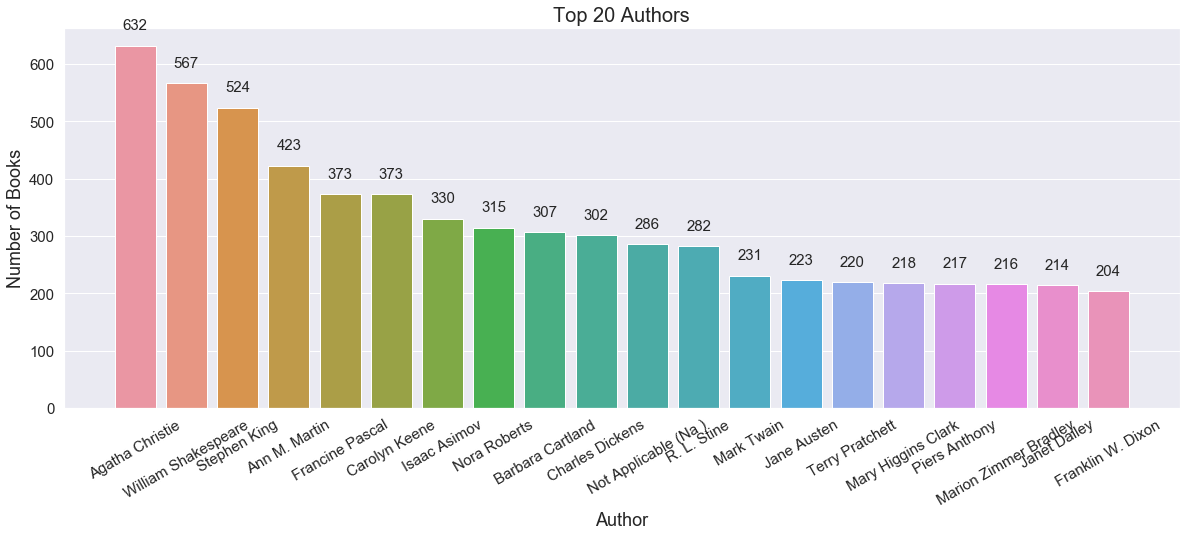

In [91]:
pdata = pd.DataFrame(books['Book-Author'].value_counts()[:20].reset_index().rename(columns={'index':'author','Book-Author':'Number of Books'}))

plt.yticks(fontsize=15)
plt.xticks(fontsize=15, rotation=30)
sns.set(rc={'figure.figsize':(20,7)})
bar = sns.barplot(x='author', y='Number of Books', data=pdata)

for p in bar.patches:
         bar.annotate("%.0f" % (p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', fontsize=15, xytext=(0, 20),
             textcoords='offset points')

bar.axes.set_title('Top 20 Authors',fontsize=20)
bar.set_xlabel('Author', fontsize=18)
bar.set_ylabel('Number of Books', fontsize=18)
bar.plot()

[]

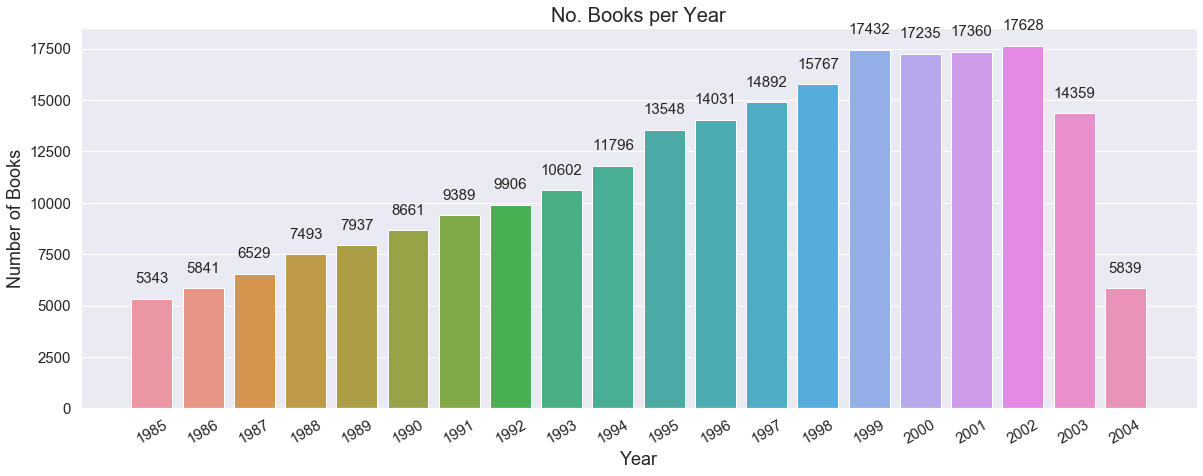

In [73]:
pdata = pd.DataFrame(books['Year-Of-Publication'].value_counts()[:20].reset_index().rename(columns={'index':'year','Year-Of-Publication':'Number of Books'}))

plt.yticks(fontsize=15)
plt.xticks(fontsize=15, rotation=30)
sns.set(rc={'figure.figsize':(20,7)})
bar = sns.barplot(x='year', y='Number of Books', data=pdata)

for p in bar.patches:
         bar.annotate("%.0f" % (p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', fontsize=15, xytext=(0, 20),
             textcoords='offset points')

bar.axes.set_title('No. Books per Year',fontsize=20)
bar.set_xlabel('Year', fontsize=18)
bar.set_ylabel('Number of Books', fontsize=18)
bar.plot()

In [90]:
books['Year-Of-Publication'].astype(str).describe()

count     271379
unique       116
top         2002
freq       17628
Name: Year-Of-Publication, dtype: object

[]

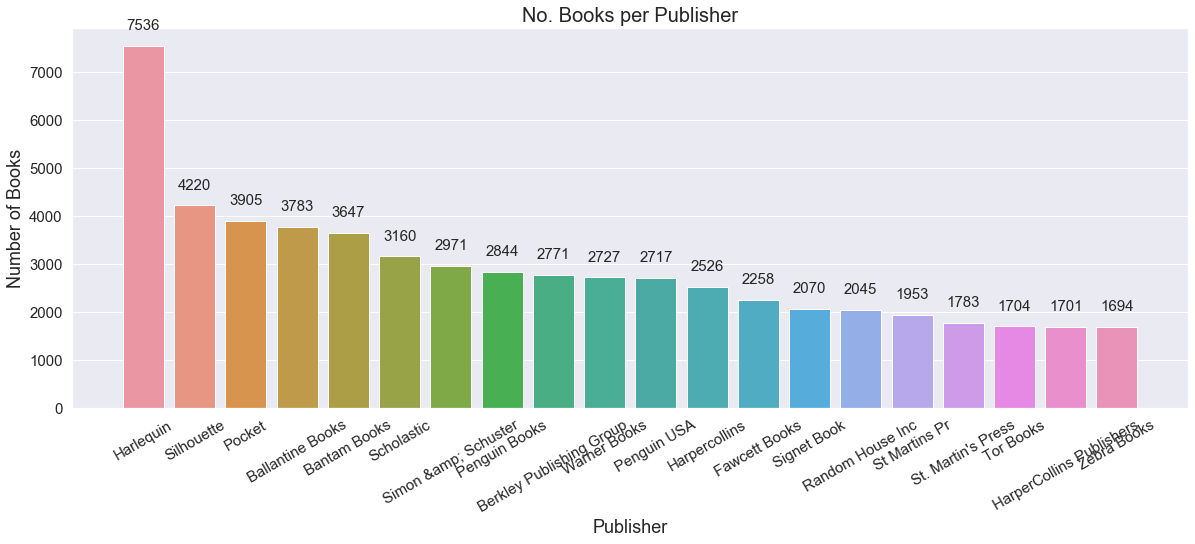

In [78]:
pdata = pd.DataFrame(books['Publisher'].value_counts()[:20].reset_index().rename(columns={'index':'year','Publisher':'Number of Books'}))

plt.yticks(fontsize=15)
plt.xticks(fontsize=15, rotation=30)
sns.set(rc={'figure.figsize':(20,7)})
bar = sns.barplot(x='year', y='Number of Books', data=pdata)

for p in bar.patches:
         bar.annotate("%.0f" % (p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', fontsize=15, xytext=(0, 20),
             textcoords='offset points')

bar.axes.set_title('No. Books per Publisher',fontsize=20)
bar.set_xlabel('Publisher', fontsize=18)
bar.set_ylabel('Number of Books', fontsize=18)
bar.plot()

In [87]:
books[['Publisher']].describe()

,Publisher
count,271377
unique,16806
top,Harlequin
freq,7536


### RATINGS

In [94]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [98]:
ratings['Book-Rating'].value_counts()

0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: Book-Rating, dtype: int64

In [102]:
ratings['User-ID'].value_counts()

11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
160469        1
231918        1
18508         1
133835        1
102760        1
Name: User-ID, Length: 105283, dtype: int64